## TexasSalaryPrediction

### Problem Statement
Using data acquired from The Texas Tribune, our goal is to create a regression model that predicts a government employee's annual salary based on given attributes:
1. Agency
2. Agency Name
3. Last Name
4. First Name
5. MI (Middle Initial)
6. Class title
7. Ethnicity
8. Gender
9. Status
10. Employ Date
11. Hourly rate
12. Hrs per week
13. Monthly (Monthly income)
14. Annual (Annual Income)
15. State number


### Importing Libraries

In [2]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt

# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport

# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Importing MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance of Regression models
from sklearn.metrics import r2_score

# Importing LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Importing SVR model from sklearn
from sklearn.svm import SVR

# Importing DecisionTreeRegressor model from sklearn
from sklearn.tree import DecisionTreeRegressor

# Importing RandomForestRegressor model from sklearn
from sklearn.ensemble import RandomForestRegressor

# Importing MLPRegressor model from sklearn
from sklearn.neural_network import MLPRegressor

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV


C:\Users\RUBACHANDIRAN K\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading data

In [3]:
# Loading the data using pandas
data=pd.read_csv('salary.csv')

### Basic checks

In [4]:
# Visualize first 5 rows of the data
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [5]:
# Visualize last 5 rows of the data
data.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking the number of rows and number of columns of the data
data.shape

(149481, 21)

In [7]:
# Checking index of the data
data.index

RangeIndex(start=0, stop=149481, step=1)

In [8]:
# Checking names of the columns in the data
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [9]:
# Checking basic information about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [10]:
# Checking null values in the data
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

Here the last 5 columns are unwanted columns.Because they have very few non-null values. So we will drop that.

In [11]:
# Dropping unwanted columns
data.drop(['duplicated','multiple_full_time_jobs','combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],axis=1,inplace=True)

In [12]:
# Checking basic statistical information for numerical columns
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06


In [13]:
# Checking basic statistical information for categorical columns
data.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481
unique,113,38675,23559,27,1481,1422,6,2,11,6295
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359


In [14]:
# Checking the column 'Annual' is exactly 12 times the column 'Monthly'
d={1:np.array(data.MONTHLY)*12,2:np.array(data['ANNUAL'])}
df=pd.DataFrame(d,columns=[1,2])
df['difference']=round(df[1]-df[2])
df[df.difference>0]

,1,2,difference


Here the column 'ANNUAL' is exactly 12 times the column 'MONTHLY'. So we will remove the column 'MONTHLY'.

In [15]:
# Dropping the column 'MONTHLY' permanently
data.drop('MONTHLY',axis=1,inplace=True)

In [16]:
# Extracting numerical columns from the data
data_num=data.select_dtypes('number')

In [17]:
# Extracting categorical columns from the data
data_cat=data.select_dtypes('object')

In [18]:
# Checking the count of unique values for the categorical columns in the data
for i in data_cat:
    print(data_cat[i].value_counts())
    print('-----------------------------------------------------')

AGENCY NAME
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: count, Length: 113, dtype: int64
-----------------------------------------------------
LAST NAME
SMITH                             1243
GARCIA                            1180
WILLIAMS                          1155
JOHNSON                           1123
MARTINEZ                          1091
                              

In [19]:
# Checking the count of unique values for the numerical columns in the data
for i in data_num:
    print(data_num[i].value_counts())
    print('---------------------------------------------')

AGENCY
529    36667
696    35926
601    13099
530    12588
405    10097
       ...  
364        7
481        5
213        4
464        4
510        1
Name: count, Length: 113, dtype: int64
---------------------------------------------
HRLY RATE
0.00000     147733
75.96150       323
18.00000       104
19.00000        95
67.30765        74
             ...  
13.34336         1
12.55817         1
31.06644         1
21.52511         1
11.74000         1
Name: count, Length: 206, dtype: int64
---------------------------------------------
HRS PER WK
40.00    146872
20.00      1339
29.00       397
30.00       210
19.00       148
35.00       123
36.25        78
24.00        78
10.00        31
25.00        25
16.00        21
32.00        21
4.00         14
8.00         12
15.00        11
39.60         8
36.24         8
50.00         8
60.00         6
41.00         5
19.20         5
5.00          5
12.00         5
18.00         4
70.00         4
36.00         3
28.00         3
27.00         2
26

### EXPLORATORY DATA ANLYSIS(EDA)

In [20]:
# Checking correlation for numerical features
cor=data_num.corr()
cor

,AGENCY,HRLY RATE,HRS PER WK,ANNUAL,STATE NUMBER
AGENCY,1.000000,-0.083653,-0.013847,-0.266452,0.060815
HRLY RATE,-0.083653,1.000000,-0.337784,0.086291,-0.007922
HRS PER WK,-0.013847,-0.337784,1.000000,0.096041,-0.010072
ANNUAL,-0.266452,0.086291,0.096041,1.000000,-0.265438
STATE NUMBER,0.060815,-0.007922,-0.010072,-0.265438,1.000000


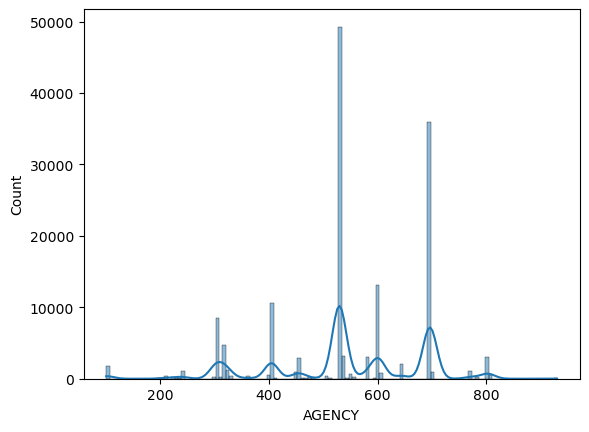

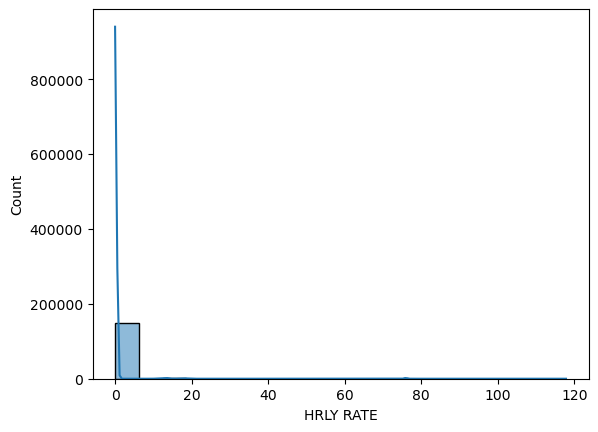

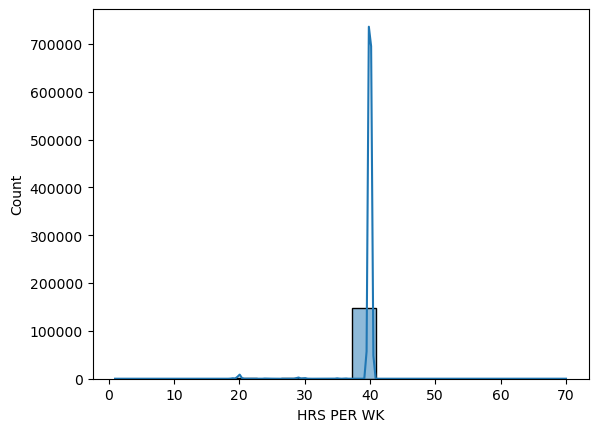

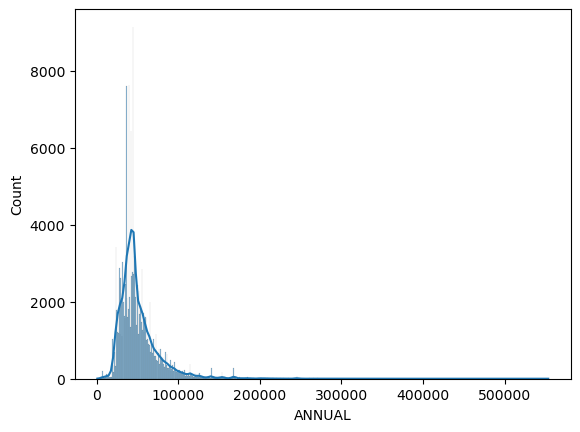

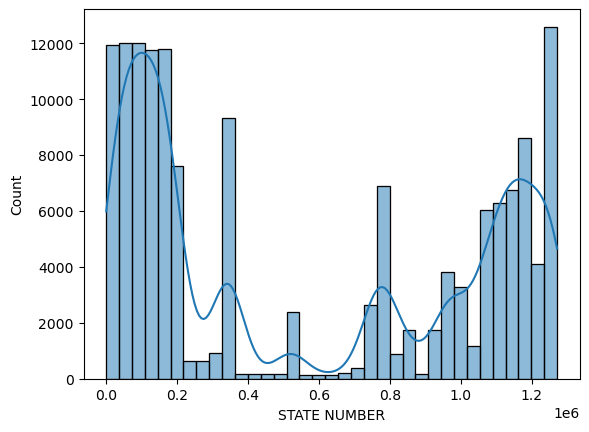

In [21]:
# Histogram for numerical columns in the data
for i in data_num:
    sns.histplot(data,x=i,kde=True)
    plt.show()

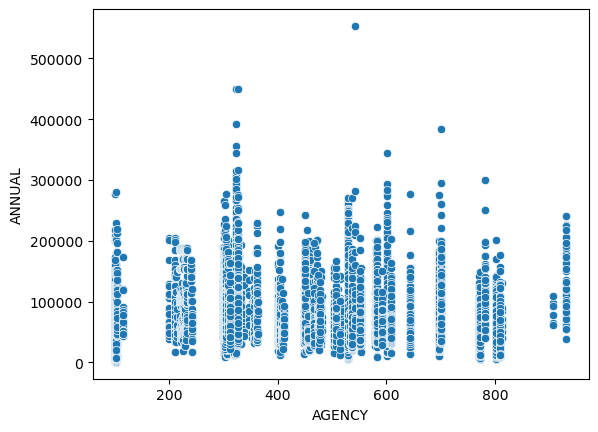

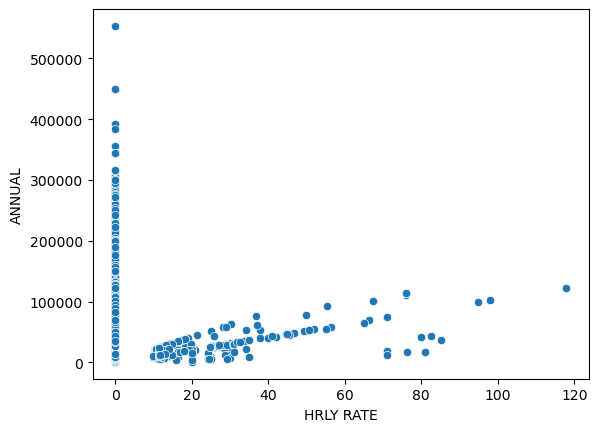

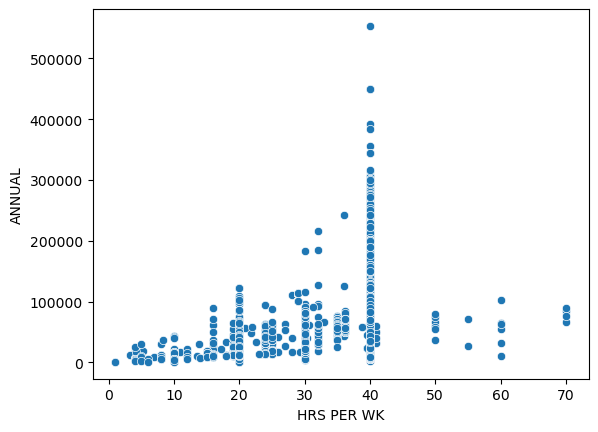

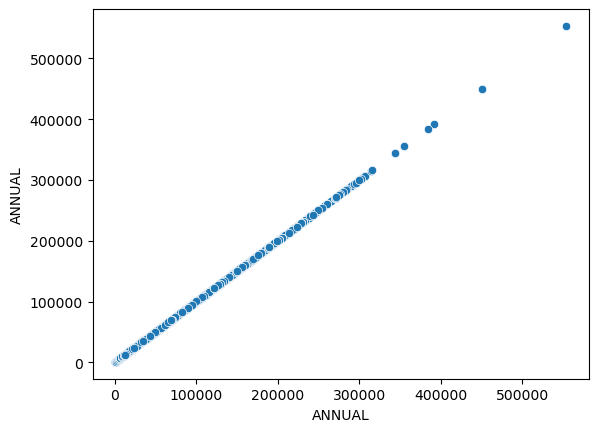

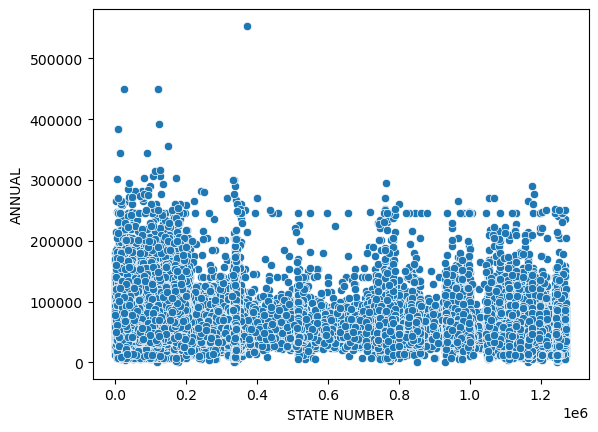

In [22]:
# Scatterplot of numerical columns in the data with 'ANNUAL' column
for i in data_num:
    sns.scatterplot(data,x=i,y='ANNUAL')
    plt.show()

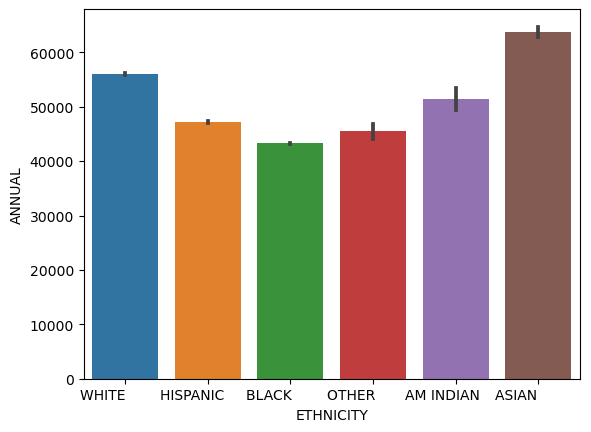

In [23]:
# Barplot for 'ETHNICITY' and 'ANNUAL'
sns.barplot(data,x='ETHNICITY',y='ANNUAL')
plt.show()

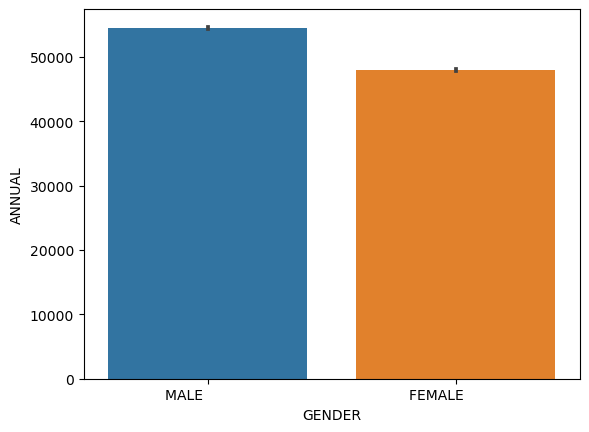

In [24]:
# Barplot for 'GENDER' and 'ANNUAL'
sns.barplot(data,x='GENDER',y='ANNUAL')
plt.show()

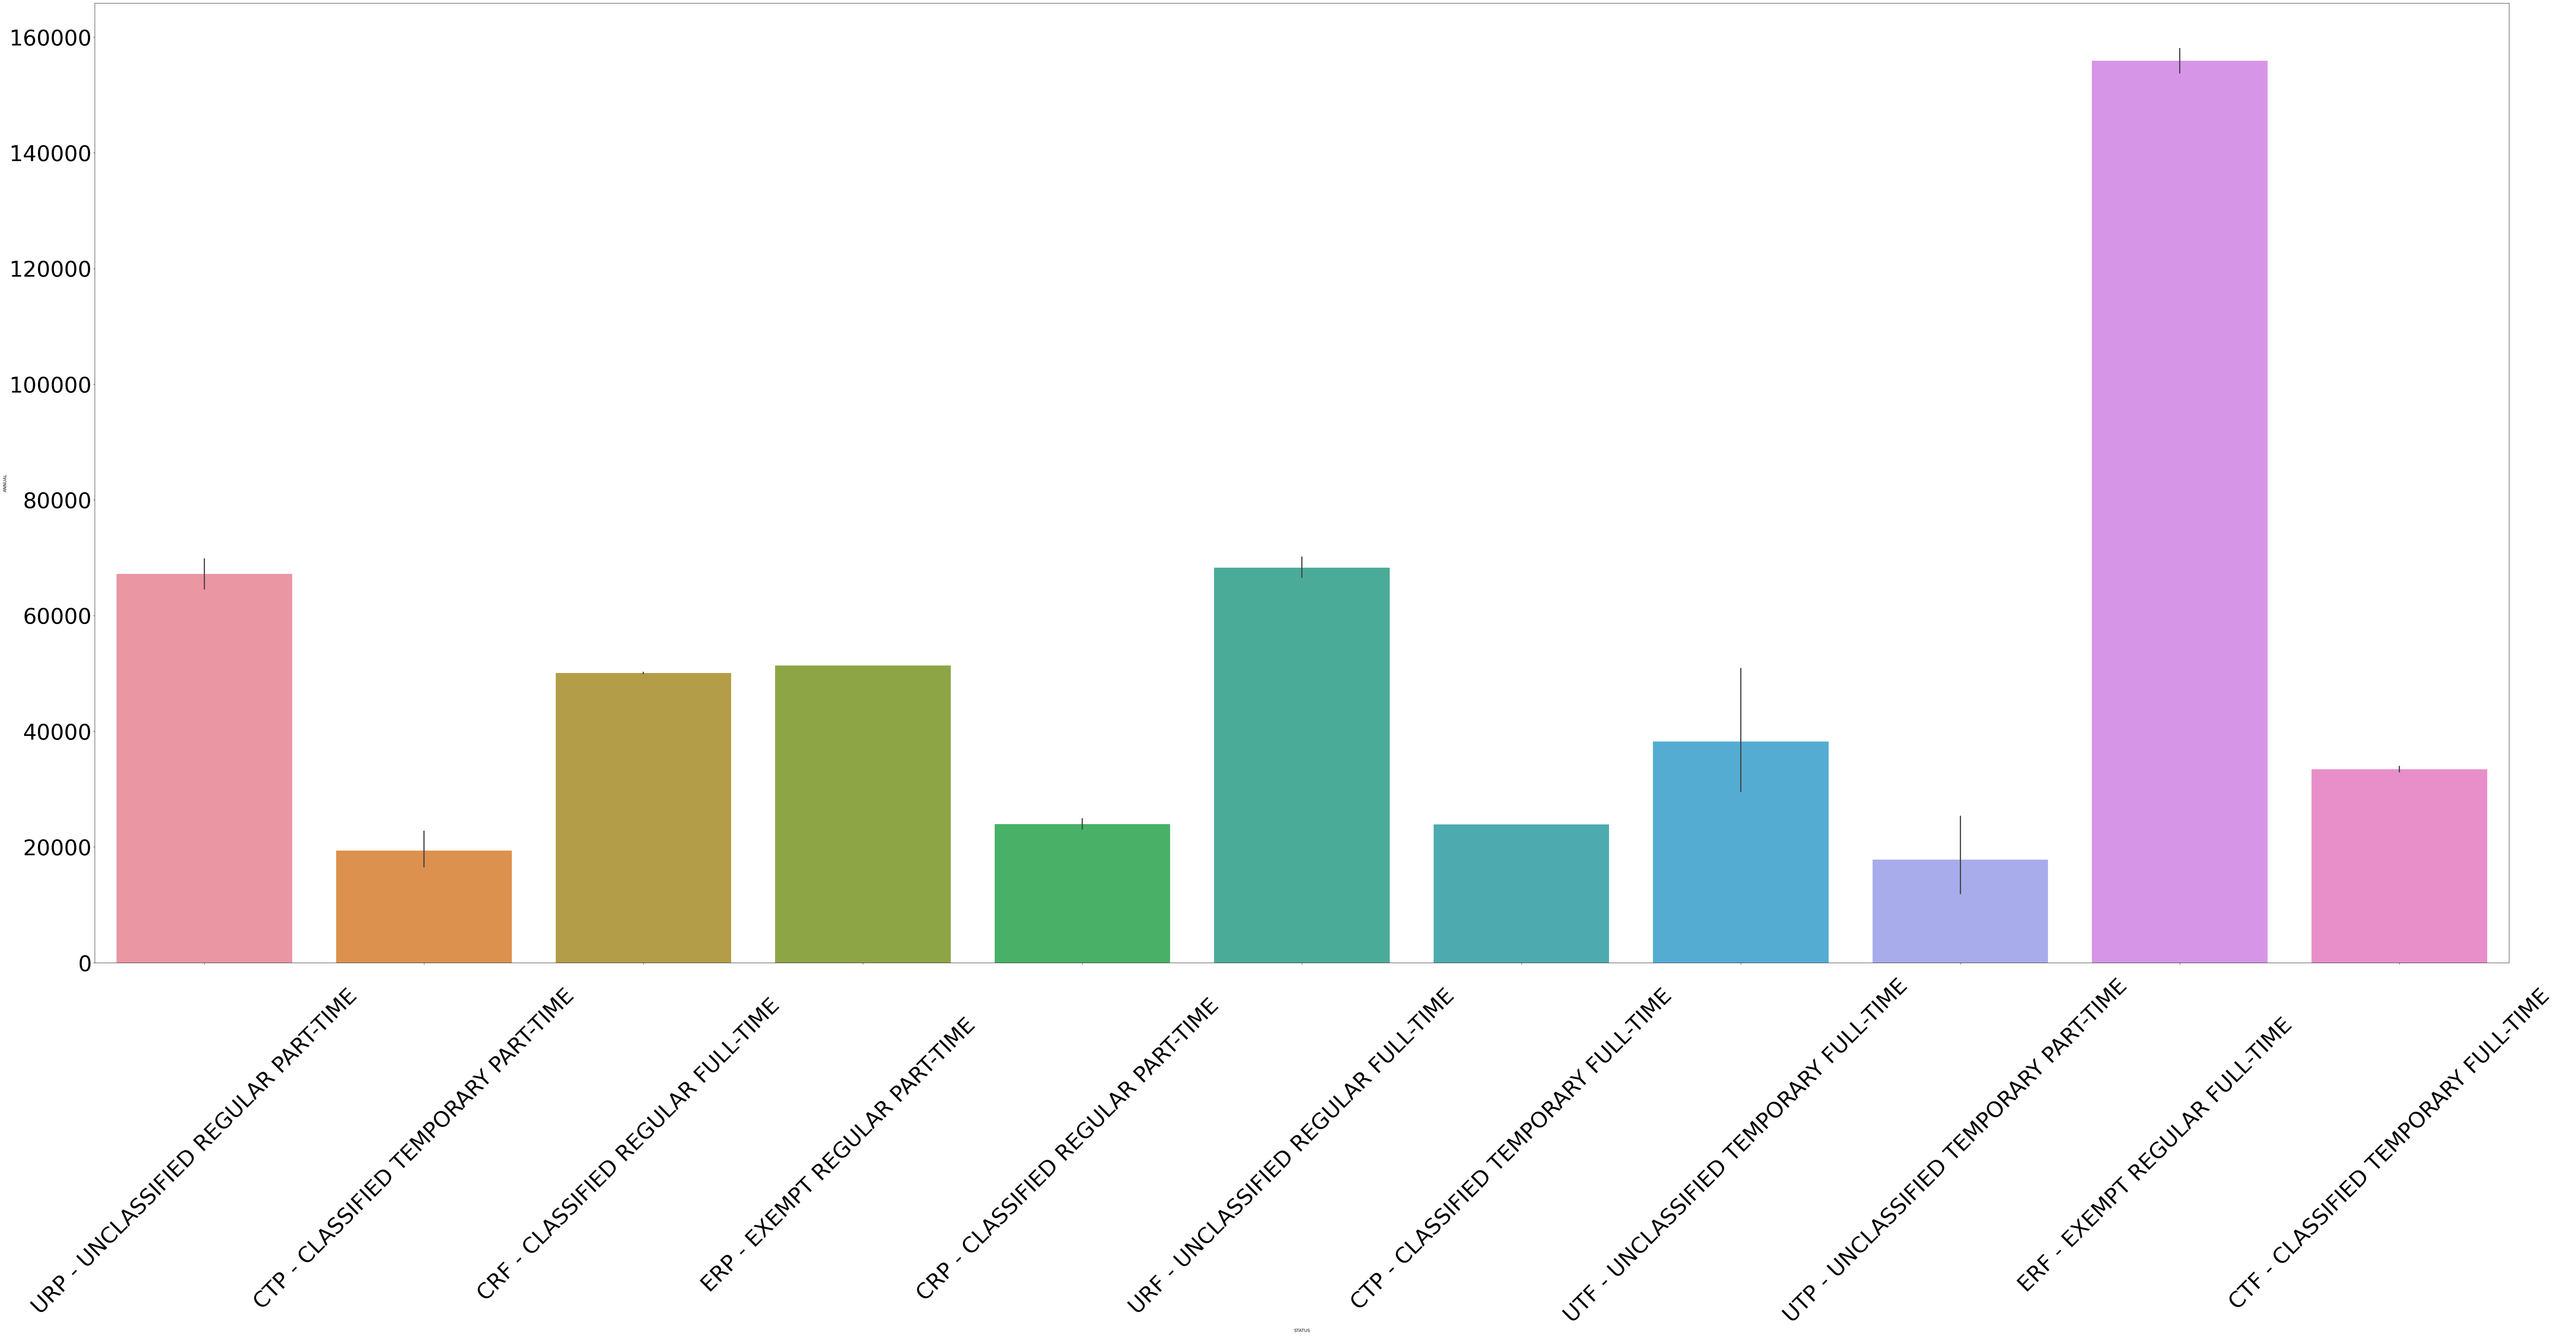

In [25]:
# Barplot for 'STATUS' and 'ANNUAL'
plt.figure(figsize=(100,40))
sns.barplot(data,x='STATUS',y='ANNUAL')
plt.xticks(rotation=45,fontsize=50)
plt.yticks(fontsize=50)
plt.show()

###### Insights
1. All the numerical columns are not in normal distribution
2. No features highly correlated to the target 
3. In 'ETHINICITY' column 'ASIAN' gets more Annual salary and 'BLACK' gets less salary
4. Comparing 'MALE' and 'FEMALE', 'MALE' gets more slary
5. In 'STATUS' column, 'ERF - EXEMPT REGULAR FULL-TIME' salary is high

<Axes: xlabel='ANNUAL', ylabel='Count'>

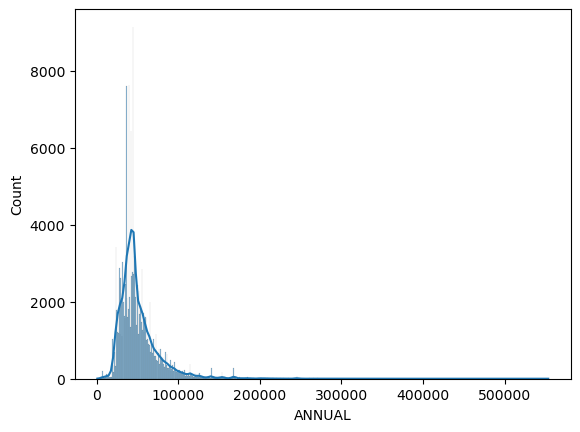

In [28]:
sns.histplot(data,x='ANNUAL',kde=True)

In [38]:
Q1=np.quantile(data['ANNUAL'],0.25)
Q3=np.quantile(data['ANNUAL'],0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)

In [42]:
data.loc[(data.ANNUAL<lower_limit) | (data.ANNUAL>upper_limit)]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,ANNUAL,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.9615,29.0,114549.84,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.9615,29.0,114549.84,59115
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,04/01/20,0.0000,40.0,154788.00,1177785
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/20,0.0000,40.0,120000.00,147334
36,101,SENATE ...,BARNETT,ANNA,P,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,07/26/10,0.0000,40.0,96000.00,49800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/23/13,0.0000,40.0,127000.08,336971
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/15/04,0.0000,40.0,100300.92,9905
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/12/05,0.0000,40.0,95000.04,38235
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,12/02/08,0.0000,40.0,122257.08,52817


In [41]:
lower_limit,upper_limit

(3010.6200000000026, 91617.18)

### Data Preprocessing

### Handling numerical features

#### HRS PER WK

<Axes: xlabel='HRS PER WK', ylabel='Count'>

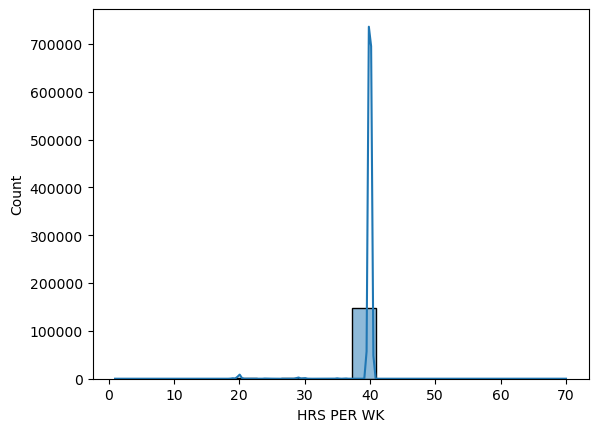

In [23]:
# Checking distribution of the column 'HRS PER WK'
sns.histplot(data,x='HRS PER WK',kde=True)

###### Insights
The distribution is thin and tall. So we use MinMaxScaler for scaling this column

In [24]:
# Initializing MinMaxScaler
minmaxscaler=MinMaxScaler()

In [25]:
# Fit and tranforming the 'HRS PER WK' column
data[['HRS PER WK']]=minmaxscaler.fit_transform(data[['HRS PER WK']])

### Handling categorical features

#### AGENCY NAME

In [26]:
# visualizing the columns 'AGENCY' and 'AGENCY NAME'
data[['AGENCY','AGENCY NAME']]

,AGENCY,AGENCY NAME
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT..."
1,212,OFFICE OF COURT ADMINISTRATION ...
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT..."
3,212,OFFICE OF COURT ADMINISTRATION ...
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...
...,...,...
149476,809,STATE PRESERVATION BOARD ...
149477,809,STATE PRESERVATION BOARD ...
149478,809,STATE PRESERVATION BOARD ...
149479,809,STATE PRESERVATION BOARD ...


In [27]:
# Checking the uniqueness of 'AGENCY' and 'AGENCY NAME' columns
data.duplicated(['AGENCY','AGENCY NAME']).sum()+len(data.AGENCY.unique())==data.shape[0]

True

In [28]:
# Checking Every AGENCY has unique AGENCY NAME

sum=0
for i in range(0,len(data.AGENCY.unique())):
    sum=sum+(data[['AGENCY','AGENCY NAME']].loc[data.AGENCY==data.AGENCY.unique()[i]].duplicated().sum())
if data.shape[0]-sum==len(data.AGENCY.unique()):
    print('Every AGENCY has unique AGENCY NAME')

Every AGENCY has unique AGENCY NAME


Since Every 'AGENCY' has unique 'AGENCY NAME', We will drop the column 'AGENCY NAME'

In [29]:
# Dropping 'AGENCY NAME' column
data.drop('AGENCY NAME',axis=1,inplace=True)

In [30]:
# Initializing LabelEncoder
label_encoder_AGENCY=LabelEncoder()

In [31]:
# Fit and tranforming the 'AGENCY' column
data['AGENCY']=label_encoder_AGENCY.fit_transform(data['AGENCY'])

#### CLASS CODE

In [32]:
# visualizing the columns 'CLASS CODE' and 'CLASS TITLE'
data[['CLASS CODE','CLASS TITLE']]

,CLASS CODE,CLASS TITLE
0,JD25,"JUDGE, RETIRED ..."
1,3524,GENERAL COUNSEL IV ...
2,JD25,"JUDGE, RETIRED ..."
3,3524,GENERAL COUNSEL IV ...
4,4504,CORREC OFFICER IV ...
...,...,...
149476,6232,SECURITY OFFICER III ...
149477,0302,WEB ADMINISTRATOR III ...
149478,0130,CUSTOMER SERVICE REP I ...
149479,1572,PROGRAM SPECIALIST III ...


In [33]:
# Checking unique values for 
data["CLASS CODE"].value_counts()

CLASS CODE
4504        9267
4505        7895
4503        4718
5622        3646
5121        3307
            ... 
U101           1
U104           1
E176           1
U103           1
E096           1
Name: count, Length: 1481, dtype: int64

In [34]:
data["CLASS TITLE"].value_counts()

CLASS TITLE
CORREC  OFFICER IV                                    9267
CORREC  OFFICER V                                     7895
CORREC OFFCR III                                      4718
TEXAS WORKS ADVISOR II                                3646
DIRECT SUPPORT PROFESSIONAL I                         3307
                                                      ... 
CHAIR,PARDONS AND PAROLES                                1
STATISTICIAN II                                          1
EX DIRECTOR TDCJ                                         1
PAYROLL SPECIALIST I                                     1
DEPUTY DIR/APPS MGR                                      1
Name: count, Length: 1422, dtype: int64

###### Insights
Since 'CLASS CODE' and 'CLASS TITLE' gives same information and 'CLASS CODE' has more unique values than 'CLASS TITLE', we will use 'CLASS CODE' column and drop 'CLASS TITLE' permanantly. 

In [35]:
# Dropping 'CLASS TITLE' column
data.drop('CLASS TITLE',axis=1,inplace=True)

In [36]:
# Initializing LabelEncoder
label_encoder_CLASS_CODE=LabelEncoder()

In [37]:
# Fit and tranforming the 'CLASS CODE' column
data['CLASS CODE']=label_encoder_CLASS_CODE.fit_transform(data['CLASS CODE'])

#### ETHNICITY

In [38]:
# Initializing OneHotEncoder
onehotencoder_ETHNICITY=OneHotEncoder()

In [39]:
# Fit and tranforming the 'ETHNICITY' column
ETHNICITY_encoded=onehotencoder_ETHNICITY.fit_transform(data[['ETHNICITY']]).toarray()

In [40]:
# Getting OneHotEncoder output features names
onehotencoder_ETHNICITY.get_feature_names_out()

array(['ETHNICITY_AM INDIAN      ', 'ETHNICITY_ASIAN          ',
       'ETHNICITY_BLACK          ', 'ETHNICITY_HISPANIC       ',
       'ETHNICITY_OTHER          ', 'ETHNICITY_WHITE          '],
      dtype=object)

In [41]:
# Creating a DataFrame of encoded array
ETHNICITY_encoded_df=pd.DataFrame(ETHNICITY_encoded,columns=['ETHNICITY_AM INDIAN', 'ETHNICITY_ASIAN',
       'ETHNICITY_BLACK', 'ETHNICITY_HISPANIC',
       'ETHNICITY_OTHER', 'ETHNICITY_WHITE'])

In [42]:
# Dropping first column from ETHNICITY_encoded_df
ETHNICITY_encoded_df.drop('ETHNICITY_AM INDIAN',axis=1,inplace=True)

In [43]:
# concatenating ETHNICITY_encoded_df and data and storing it to the data
data=pd.concat([ETHNICITY_encoded_df,data],axis=1)

In [44]:
# Removing the 'ETHNICITY' column from the data
data.drop('ETHNICITY',axis=1,inplace=True)

#### GENDER

In [45]:
# Initializing OneHotEncoder
onehotencoder_GENDER=OneHotEncoder()

In [46]:
# Fit and tranforming the 'GENDER' column
GENDER_encoded=onehotencoder_GENDER.fit_transform(data[['GENDER']]).toarray()

In [47]:
# Getting OneHotEncoder output features names
onehotencoder_GENDER.get_feature_names_out()

array(['GENDER_FEMALE         ', 'GENDER_MALE           '], dtype=object)

In [48]:
# Creating a DataFrame of encoded array
GENDER_encoded_df=pd.DataFrame(GENDER_encoded,columns=['GENDER_FEMALE','GENDER_MALE'])

In [49]:
# Dropping first column from GENDER_encoded_df
GENDER_encoded_df.drop('GENDER_FEMALE',axis=1,inplace=True)

In [50]:
# concatenating GENDER_encoded_df and data and storing it to the data
data=pd.concat([GENDER_encoded_df,data],axis=1)

In [51]:
# Removing the 'GENDER' column from the data
data.drop('GENDER',axis=1,inplace=True)

#### STATUS

In [52]:
# Initializing OneHotEncoder
onehotencoder_STATUS=OneHotEncoder()

In [53]:
# Fit and tranforming the 'STATUS' column
STATUS_encoded=onehotencoder_STATUS.fit_transform(data[['STATUS']]).toarray()

In [54]:
# Getting OneHotEncoder output features names
onehotencoder_STATUS.get_feature_names_out()

array(['STATUS_CRF - CLASSIFIED REGULAR FULL-TIME      ',
       'STATUS_CRP - CLASSIFIED REGULAR PART-TIME      ',
       'STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME    ',
       'STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME    ',
       'STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME    ',
       'STATUS_ERF - EXEMPT REGULAR FULL-TIME          ',
       'STATUS_ERP - EXEMPT REGULAR PART-TIME          ',
       'STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME    ',
       'STATUS_URP - UNCLASSIFIED REGULAR PART-TIME    ',
       'STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME  ',
       'STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME  '], dtype=object)

In [55]:
# Creating a DataFrame of encoded array
STATUS_encoded_df=pd.DataFrame(STATUS_encoded,columns=['STATUS_CRF - CLASSIFIED REGULAR FULL-TIME',
       'STATUS_CRP - CLASSIFIED REGULAR PART-TIME',
       'STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME',
       'STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME',
       'STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME',
       'STATUS_ERF - EXEMPT REGULAR FULL-TIME',
       'STATUS_ERP - EXEMPT REGULAR PART-TIME',
       'STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME',
       'STATUS_URP - UNCLASSIFIED REGULAR PART-TIME',
       'STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME',
       'STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME'])

In [56]:
# Dropping first column from STATUS_encoded_df
STATUS_encoded_df.drop('STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME',axis=1,inplace=True)

In [57]:
# concatenating STATUS_encoded_df and data and storing it to the data
data=pd.concat([STATUS_encoded_df,data],axis=1)

In [58]:
# Removing the 'STATUS' column from the data
data.drop('STATUS',axis=1,inplace=True)

### Removing features

1. The columns 'LAST NAME', 'FIRST NAME', 'MI' and 'STATE NUMBER' are unique features and they are not necessary for model training. So we will remove these columns
2. The column 'HRLY RATE' has value 0 for nearly 99% rows. So we will remove 'HRLY RATE' column
3. We did not able to extract useful information form the column 'EMPLOY DATE'. So we will remove that also

In [59]:
# Dropping above mentioned columns
data.drop(['LAST NAME', 'FIRST NAME', 'MI','STATE NUMBER','HRLY RATE','EMPLOY DATE'],axis=1,inplace=True)

In [60]:
# Final preprocessed data for model training
data

,STATUS_CRF - CLASSIFIED REGULAR FULL-TIME,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,GENDER_MALE,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPANIC,ETHNICITY_OTHER,ETHNICITY_WHITE,AGENCY,CLASS CODE,HRS PER WK,ANNUAL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,25,1409,0.405797,114549.84
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8,616,0.043478,16857.24
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,25,1409,0.405797,114549.84
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8,616,0.043478,16857.24
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,102,810,0.565217,39411.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,109,1042,0.565217,34788.00
149477,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,109,84,0.565217,66000.00
149478,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,109,4,0.275362,13447.20
149479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,109,278,0.565217,68929.92


### Splitting data

In [68]:
## Extracting features from the data
X=data.drop(['ANNUAL'],axis=1)

# Extracting target from the data
y=data['ANNUAL']

In [69]:
# Splitting training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

### Model training

#### Linear Regression

In [76]:
# Initializing LinearRegression model
linear_model=LinearRegression()

# Fitting the training data to the Linear Regression model
linear_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=linear_model.predict(x_test)

In [77]:
# Evaluating the LinearRegression model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.24904151857294432
The Adjusted R2_score is  0.24894605412973103


In [78]:
# R2 score for Linear regression model
linear_regression_r2_score=R2

#### Support Vector Machine

In [82]:
# Initializing SVR model
svm_model=SVR()

# Fitting the training data to the SVR model
svm_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=svm_model.predict(x_test)

In [83]:
# Evaluating the SVR model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  -0.0064322832303007615
The Adjusted R2_score is  -0.006560224388070246


In [84]:
# R2 score for SVR model
svm_r2_score=R2

#### Decision Tree

In [73]:
# Initializing DecisionTreeRegressor model
decision_tree_model=DecisionTreeRegressor()
# Fitting the training data to the DecisionTreeRegressor model
decision_tree_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=decision_tree_model.predict(x_test)

In [74]:
# Evaluating the DecisionTreeRegressor model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.9357139074849022
The Adjusted R2_score is  0.9357057352141575


In [75]:
# R2 score for DecisionTreeRegressor model
decison_tree_r2_score=R2

#### Random forest

In [ ]:
# Initializing RandomForestRegressor model
model=RandomForestRegressor()

# Fitting the training data to the RandomForestRegressor model
model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=model.predict(x_test)

In [ ]:
# Evaluating the RandomForestRegressor model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

##### Hyperparameter tuning 1 for Random Forest 

In [63]:
# Initializing RandomForestRegressor model
model_ht=RandomForestRegressor()

In [64]:
# Creating a dictionary with possible Hyperparameters
params={'n_estimators':[100,200,300,500] ,
        'criterion':["squared_error", "absolute_error"] ,
        'max_depth':list(range(1,20)) ,
        'min_samples_split':list(range(1,20)) ,
        'min_samples_leaf':list(range(1,20)) 
        }

In [65]:
# Initializing RandomizedSearchCV
forest_cv=RandomizedSearchCV(estimator=model_ht,
                            param_distributions=params,
                            scoring='r2',
                            n_jobs=-1,
                            cv=5,
                            verbose=3
                            )

In [184]:
# Fitting the training data to the RandomizedSearchCV
forest_cv.fit(x_train,y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19],
                                        'n_estimators': [100, 200, 300, 500]},
                   scoring='r2', verbose=3)

In [185]:
# Getting best hyperparameters
forest_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 17,
 'min_samples_leaf': 5,
 'max_depth': 18,
 'criterion': 'squared_error'}

In [66]:
# Checking for the best model with hyperparameters obtained by changing random_state in train_test_split
r2=[]
for i in range(0,43):
    x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=0.2,random_state=i)
    test_model=RandomForestRegressor(n_estimators=100,min_samples_split=17,min_samples_leaf=5,max_depth=18)
    test_model.fit(x_tr,y_tr)
    y_pr=test_model.predict(x_te)
    r2.append(r2_score(y_te,y_pr))
print('The best R2_score obtained for the random_state ',np.argmax(r2),'is ',r2[np.argmax(r2)])

The best R2_score obtained for the random_state  34 is  0.9367581856805757


##### Hyperparameter tuning 2 for Random Forest

In [146]:
# Initializing RandomForestRegressor model
model_ht=RandomForestRegressor()

In [147]:
# Creating a dictionary with possible Hyperparameters
params={'n_estimators':[100,200,300] ,
        'max_depth':list(range(1,20)) ,
        'min_samples_split':list(range(1,20)) ,
        'min_samples_leaf':list(range(1,20)) ,
        'random_state':list(range(0,43))
        }

In [148]:
# Initializing RandomizedSearchCV
forest_cv=RandomizedSearchCV(estimator=model_ht,
                            param_distributions=params,
                            scoring='r2',
                            n_jobs=-1,
                            cv=5,
                            verbose=3,
                            n_iter=1000
                            )

In [149]:
# Fitting the training data to the RandomizedSearchCV
forest_cv.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]},
                   scoring='r2', verbose=3)

In [151]:
# Getting best hyperparameters
forest_cv.best_params_

{'random_state': 17,
 'n_estimators': 100,
 'min_samples_split': 11,
 'min_samples_leaf': 1,
 'max_depth': 19}

In [67]:
# Checking for the best model with hyperparameters obtained by changing random_state in train_test_split
r2=[]
for i in range(0,43):
    x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=0.2,random_state=i)
    test_model=RandomForestRegressor(n_estimators=100,max_depth=19,min_samples_leaf=1,min_samples_split=11,random_state=17)
    test_model.fit(x_tr,y_tr)
    y_pr=test_model.predict(x_te)
    r2.append(r2_score(y_te,y_pr))
print('The best R2_score obtained for the random_state ',np.argmax(r2),'is ',r2[np.argmax(r2)])

The best R2_score obtained for the random_state  34 is  0.9438217563850996


##### Best Random Forest Model

In [70]:
# Initializing RandomForestRegressor model
random_forest_model=RandomForestRegressor(n_estimators=100,max_depth=19,min_samples_leaf=1,min_samples_split=11,random_state=17)

# Fitting the training data to the RandomForestRegressor model
random_forest_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=random_forest_model.predict(x_test)

In [71]:
# Evaluating the RandomForestRegressor model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.9438217563850996
The Adjusted R2_score is  0.9438146148121898


In [72]:
# R2 score for RandomForestRegressor model
random_forest_r2_score=R2

#### Artificial Neural Network

In [79]:
# Initializing MLPRegressor model
ann_model=MLPRegressor(learning_rate_init=0.1,max_iter=300)

# Fitting the training data to the MLPRegressor model
ann_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=ann_model.predict(x_test)

In [80]:
# Evaluating the MLPRegressor model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.47491786680609616
The Adjusted R2_score is  0.47485111654662593


In [81]:
# R2 score for MLPRegressor model
ann_r2_score=R2

### Model Comparison Report

In [85]:
# Creating a dictionary for the model and their corresponding r2_score 
comparison_dict={'Model':['LinearRegression','SVR','DecisionTreeRegressor','RandomForestRegressor','MLPRegressor'],
                    'R2_score':[linear_regression_r2_score,svm_r2_score,decison_tree_r2_score,random_forest_r2_score,ann_r2_score]
                }
# Creating dataframe 
comparison_df=pd.DataFrame(comparison_dict)

# Sorting the dataframe by the r2_score column in descending order
comparison_df=comparison_df.sort_values(by='R2_score', ascending=False)

# Setting the index as the model column
comparison_df=comparison_df.set_index('Model')

# Visualizing the dataframe
print('The DataFrame showing performance of different models:')
print("")
print(comparison_df)

The DataFrame showing performance of different models:

                       R2_score
Model                          
RandomForestRegressor  0.943822
DecisionTreeRegressor  0.935714
MLPRegressor           0.474918
LinearRegression       0.249042
SVR                   -0.006432


In [86]:
print('The maximum R2_score',comparison_df.R2_score[0],'is obtained from',comparison_df.index[0],'Model')

The maximum R2_score 0.9438217563850996 is obtained from RandomForestRegressor Model


### Report On Challenges Faced

1. There are many columns with more 99 percent of data are  null values
2. The column'HRLY RATE' has value zero for 99 percent of entries
3. Finding the outliers is difficult